In [60]:
import torch
from torch import nn
import os
from torchvision import datasets, transforms

In [61]:
net_Alex = nn.Sequential(
        nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Flatten(),
        nn.Linear(6400, 4096), nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, 4096), nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, 10))

num_inputs, num_outputs, num_hiddens = 784, 10, 256
net_Linear = nn.Sequential(nn.Flatten(),
                            nn.Linear(num_inputs, num_hiddens), 
                            nn.ReLU(),
                            nn.Linear(num_hiddens, num_hiddens), 
                            nn.ReLU(),
                            nn.Linear(num_hiddens, num_hiddens), 
                            nn.ReLU(),
                            nn.Linear(num_hiddens, num_outputs))

In [62]:
dir_path = os.getcwd()
net_Alex.load_state_dict(torch.load(os.path.join(dir_path, 'net_alex_256.params'), map_location=torch.device('cpu')))
net_Linear.load_state_dict(torch.load(os.path.join(dir_path, 'net_linear.params'), map_location=torch.device('cpu')))

<All keys matched successfully>

In [63]:
batch_size = 128
data_tf_linear = transforms.Compose([
    #transforms.Resize((224, 224)),  # 调整图像大小到 224x224
    transforms.ToTensor()
])
text_dataset_linear = datasets.MNIST(root='./MNIST',train=False,transform=data_tf_linear,download=True)
text_iter_linear = torch.utils.data.DataLoader(text_dataset_linear,batch_size=256,shuffle=True)

data_tf_Alex = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小到 224x224
    transforms.ToTensor()
])
text_dataset_Alex = datasets.MNIST(root='./MNIST',train=False,transform=data_tf_Alex,download=True)
text_iter_Alex = torch.utils.data.DataLoader(text_dataset_Alex,batch_size=256,shuffle=True)



In [64]:
loss = nn.CrossEntropyLoss()
loss_sum_linear = 0
loss_sum_Alex = 0
accuracy_sum_linear = 0
accuracy_sum_Alex = 0
with torch.no_grad():
    for X,y in text_iter_linear:
        y_hat = net_Linear(X)
        acc = 0
        for i in range(len(y_hat)):
            if torch.argmax(y_hat[i]) == y[i]:
                acc += 1
        l = loss(y_hat,y)
        loss_sum_linear += l
        accuracy_sum_linear += acc/len(y_hat)

    for X,y in text_iter_Alex:
        y_hat = net_Alex(X)
        acc = 0
        for i in range(len(y_hat)):
            if torch.argmax(y_hat[i]) == y[i]:
                acc += 1
        l = loss(y_hat,y)
        loss_sum_Alex += l
        accuracy_sum_Alex += acc/len(y_hat)

loss_linear = loss_sum_linear / len(text_iter_linear)
loss_alex = loss_sum_Alex / len(text_iter_Alex)
accuracy_linear = accuracy_sum_linear / (len(text_iter_linear))
accuracy_alex = accuracy_sum_Alex / (len(text_iter_Alex))
print('Linear_loss:', loss_linear, 'Linear_accuracy:', accuracy_linear)
print('Alex:', loss_alex, 'Alex_accuracy:', accuracy_alex)

Linear_loss: tensor(0.0945) Linear_accuracy: 0.9708984375
Alex: tensor(0.0515) Alex_accuracy: 0.98310546875


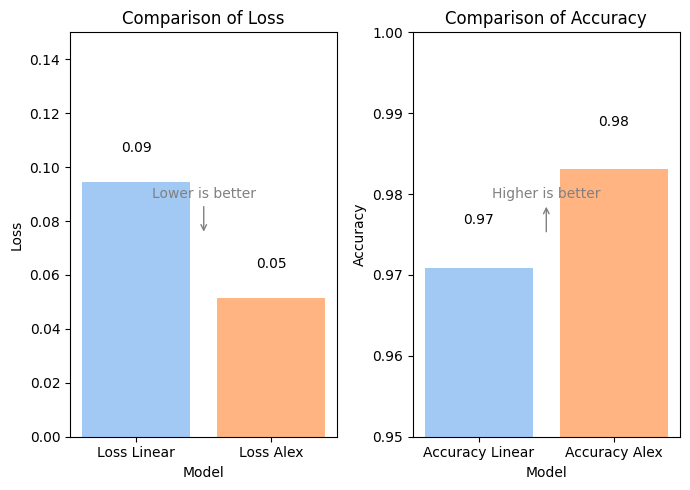

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("pastel")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5))

# 绘制 Loss 图
bars1 = ax1.bar(['Loss Linear', 'Loss Alex'], [loss_linear, loss_alex], color=colors[:2])
ax1.set_title('Comparison of Loss')
ax1.set_xlabel('Model')
ax1.set_ylabel('Loss')
ax1.set_ylim(0, 0.15)  # 设置 y 轴起始值为 0
ax1.annotate('Lower is better', xy=(0.5, 0.5), xycoords='axes fraction',
             xytext=(0.5, 0.6), textcoords='axes fraction',
             ha='center', va='center', color='gray',
             arrowprops=dict(arrowstyle='->', color='gray'))

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# 绘制 Accuracy 图
bars2 = ax2.bar(['Accuracy Linear', 'Accuracy Alex'], [accuracy_linear, accuracy_alex], color=colors[:2])
ax2.set_title('Comparison of Accuracy')
ax2.set_xlabel('Model')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.95, 1)  # 设置 y 轴起始值为 0.95
ax2.annotate('Higher is better', xy=(0.5, 0.5), xycoords='axes fraction',
             xytext=(0.5, 0.6), textcoords='axes fraction',
             ha='center', va='center', color='gray',
             arrowprops=dict(arrowstyle='<-', color='gray'))

for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [71]:
total_params_linear = sum(p.numel() for p in net_Linear.parameters())
print(f'Total number of parameters of Linear: {total_params_linear}')
total_params_alex = sum(p.numel() for p in net_Alex.parameters())
print(f'Total number of parameters of Alex: {total_params_alex}')

Total number of parameters of Linear: 335114
Total number of parameters of Alex: 46764746
